# 의사결정나무

In [34]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

font_location = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = matplotlib.font_manager.FontProperties(fname = font_location).get_name()
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rc('font',family= font_name)

# 데이터 분할
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [2]:
df_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/체질검사.csv', engine='python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [3]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis=1, inplace=False)

In [4]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size = 0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [6]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.295


In [8]:
tree_uncustomized

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [10]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []
# min_samples_leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf :
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [11]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.295
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


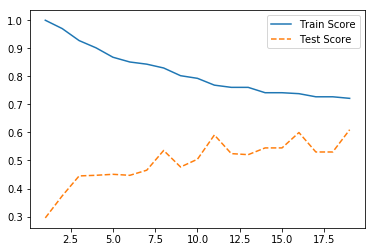

In [12]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label='Test Score')
plt.legend()

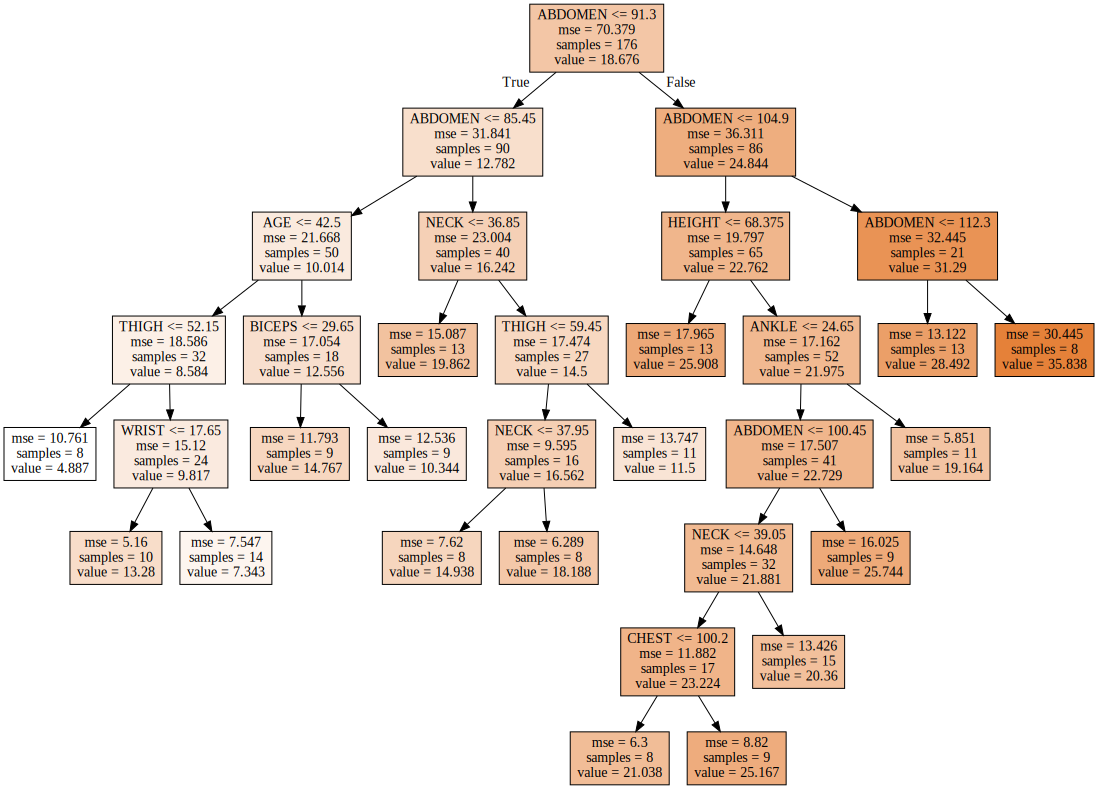

In [13]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 노드의 최소 자료 수 = 8모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot',
               feature_names = v_feature_name, impurity=True, filled=True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

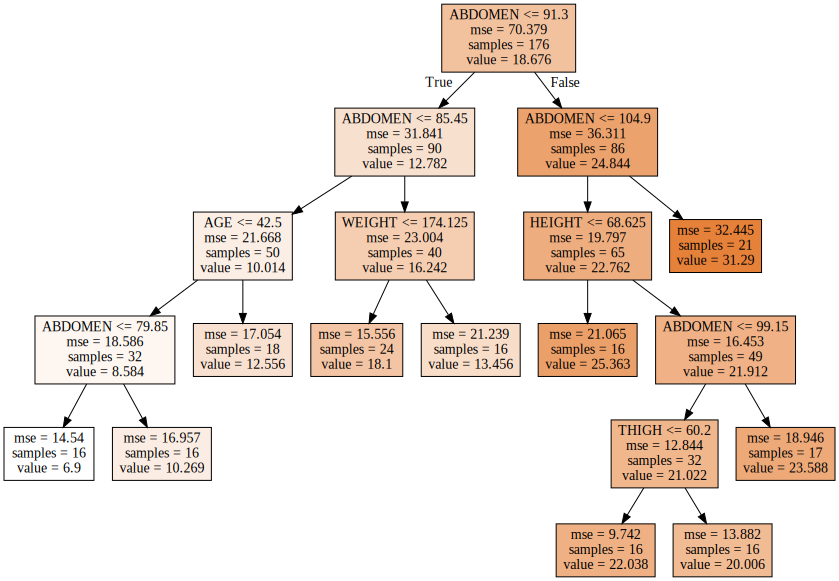

In [14]:
# 노드의 최소 자료 수 = 16모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot',
               feature_names = v_feature_name, impurity=True, filled=True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [16]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []
# min_samples_split : 분리 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range (8, 20)]

for v_min_samples_split in para_split :
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8,
                                min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,16,0.830,0.536
1,18,0.821,0.557
2,20,0.813,0.581
3,22,0.792,0.567
4,24,0.792,0.567
5,26,0.775,0.576
6,28,0.762,0.540
7,30,0.762,0.540
8,32,0.762,0.540
9,34,0.745,0.541


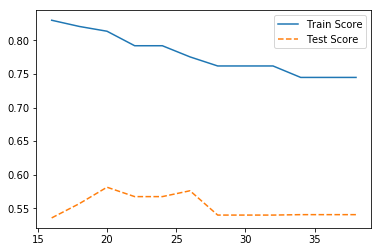

In [18]:
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='--', label='Test Score')
plt.legend()

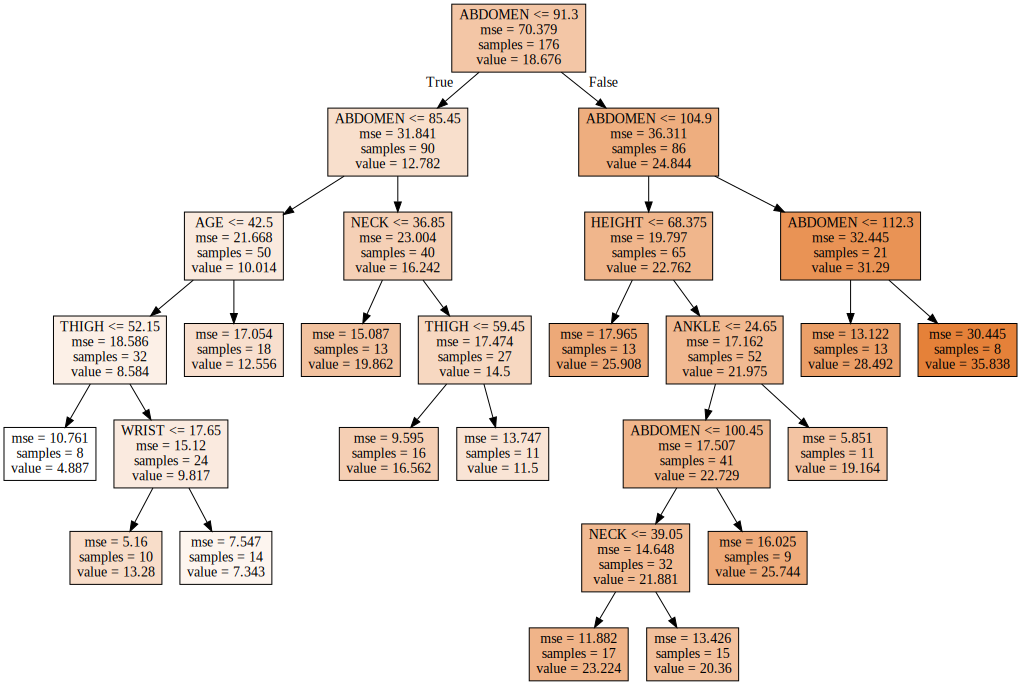

In [19]:
# 분리 노드의 최소 자료 수 = 20모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot',
               feature_names = v_feature_name, impurity=True, filled=True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

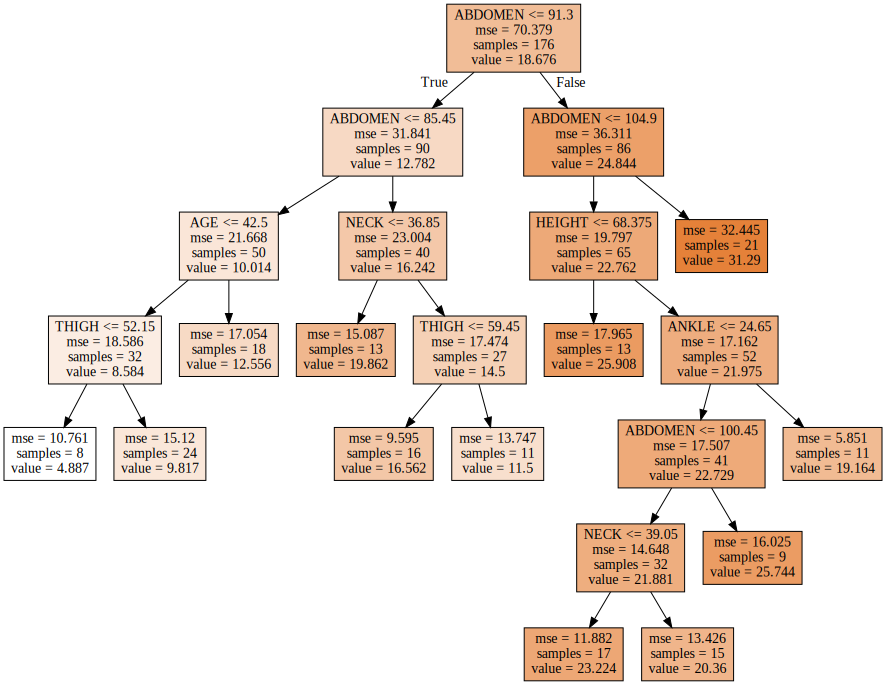

In [20]:
# 분리 노드의 최소 자료 수 = 26모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=26)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot",
               feature_names = v_feature_name, impurity =True, filled=True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [22]:
train_score=[]
test_score=[]
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(4, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20,
                                max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [23]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,4,0.783,0.570
1,5,0.808,0.581
2,6,0.813,0.581
3,7,0.813,0.581
4,8,0.813,0.581
5,9,0.813,0.581
6,10,0.813,0.581


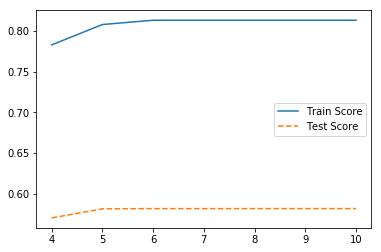

In [24]:
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.legend()

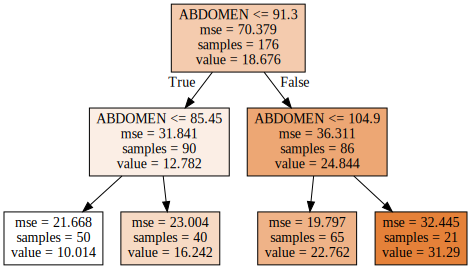

In [25]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=2)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file='tree_depth.dot',
               feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_depth.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

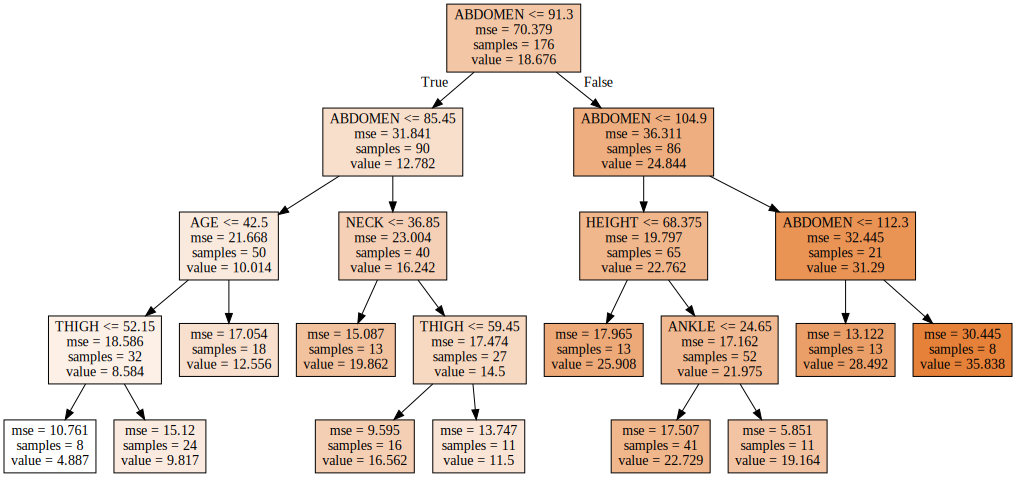

In [26]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=4)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file='tree_depth.dot',
               feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_depth.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [27]:
tree_final = DecisionTreeRegressor(min_samples_leaf=8, min_samples_split=20, max_depth=4, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [28]:
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set : 0.783
Score on test set : 0.570


In [31]:
# tree.feature_importance_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# df_feature_importance 의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=True, inplace=True)
df_importance.round(3)

,Feature,Importance
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000
10,BICEPS,0.000
11,FOREARM,0.000
12,WRIST,0.000
9,ANKLE,0.011
2,HEIGHT,0.017
0,AGE,0.019


Text(0, 0.5, '변수')

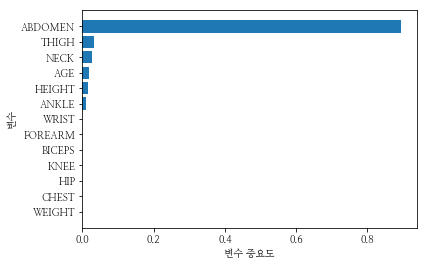

In [35]:
# 설명변수 중요도 그래프(중요도가 높은 변수를 상위에 그림)
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [37]:
estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion" : ['mse', 'friedman_mse', 'mae'], "max_features" : ['auto','sqrt','log2'],
             "max_depth" : para_depth, "min_samples_split" : para_split, "min_samples_leaf" : para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model : 
DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=16, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

best parameter : 
{'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 17, 'min_samples_split': 16}

best score : 
0.636


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
tree_best = DecisionTreeRegressor(criterion='mae',min_samples_leaf=17, min_samples_split=16, max_depth=4, random_state=1234)
tree_best.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mae', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=16, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

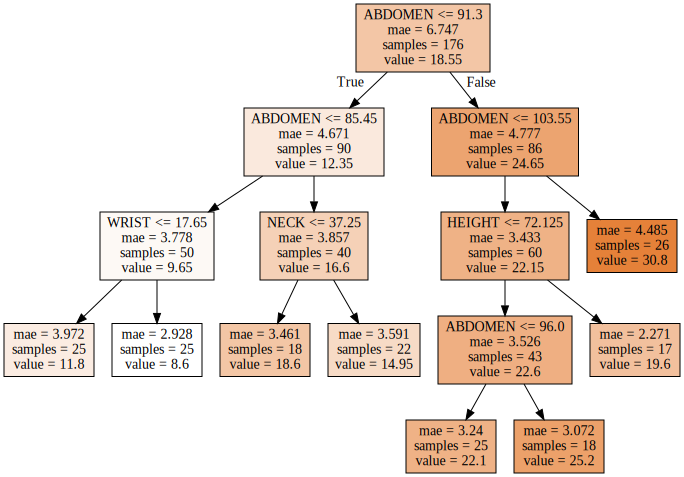

In [40]:
export_graphviz(tree_best, out_file='tree_best.dot',
               feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_best.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [43]:
# train 데이터 설명력
print("Score on train set : {:.3f}".format(tree_best.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(tree_best.score(df_test_x, df_test_y)))

Score on train set : 0.708
Score on test set : 0.558


## 실습문제

In [44]:
df_diabetes = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/DIABETES.csv', engine='python')
df_diabetes.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [45]:
df_diabetes.isnull().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

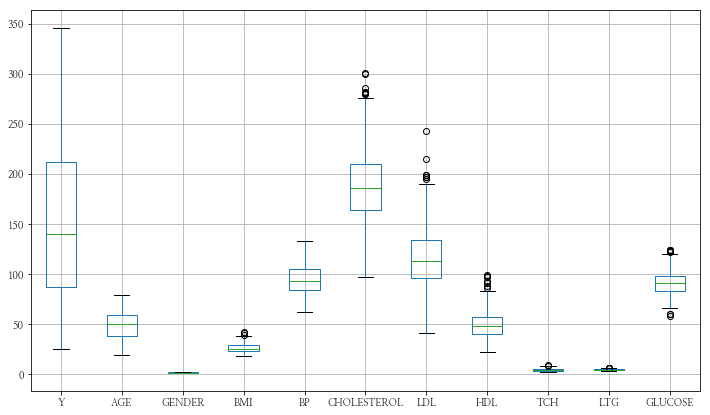

In [49]:
df_diabetes.boxplot(figsize=(12,7))

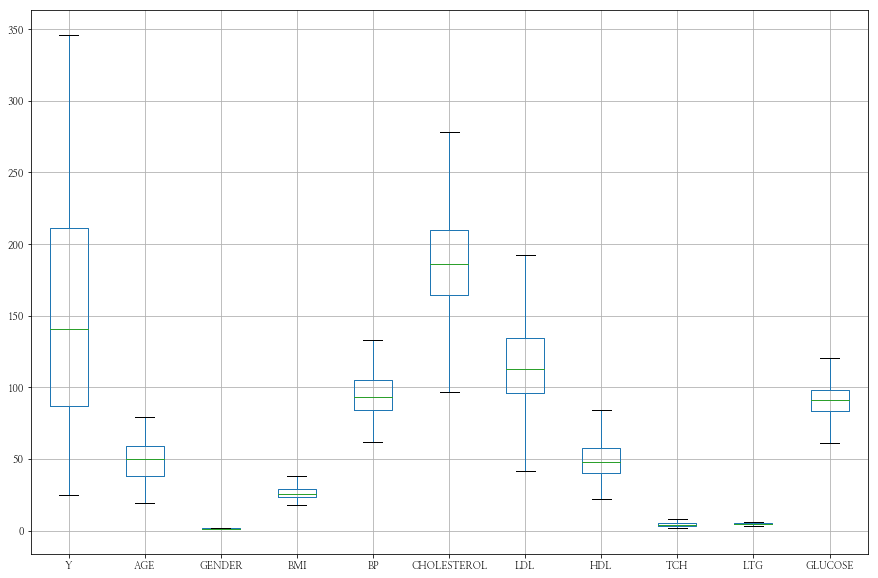

In [51]:
import numpy as np

# 이상치 제거
for i in range(1, 11, 1) :
   num1, num2 = np.percentile(df_diabetes.iloc[:,[i]], [25, 75])

   iqr_max = num2 + 1.5 * (num2- num1)
   iqr_min = num1 - 1.5 * (num2- num1)

   for j in range(0, len(df_diabetes.iloc[:,[i]])) :
       if (df_diabetes.iloc[j,i] > iqr_max):
           df_diabetes.iloc[j,i] = iqr_max
       elif (df_diabetes.iloc[j,i] < iqr_min) :
           df_diabetes.iloc[j,i] = iqr_min

df_diabetes.boxplot(figsize=(15,10))

In [52]:
dfd_raw_y = df_diabetes['Y']
dfd_raw_x = df_diabetes.drop('Y', axis=1, inplace=False)

dfd_train_x, dfd_test_x, dfd_train_y, dfd_test_y = train_test_split(dfd_raw_x, dfd_raw_y, 
                                                                    test_size=0.3, random_state=1234)
print("train data X size : {}".format(dfd_train_x.shape))
print("train data Y size : {}".format(dfd_train_y.shape))
print("test data X size : {}".format(dfd_test_x.shape))
print("test data Y size : {}".format(dfd_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


In [57]:
dtrain_score=[]
dtest_score=[]
dpara_leaf = [n_leaf for n_leaf in range(1, 30)]

for v_min_samples_leaf in dpara_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(dfd_train_x, dfd_train_y)
    dtrain_score.append(tree.score(dfd_train_x, dfd_train_y))
    dtest_score.append(tree.score(dfd_test_x, dfd_test_y))
    
dfd_score_leaf = pd.DataFrame()
dfd_score_leaf['MinSamplesLeaf'] = dpara_leaf
dfd_score_leaf['TrainScore'] = dtrain_score
dfd_score_leaf['TestScore'] = dtest_score

In [58]:
dfd_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,-0.135
1,2,0.953,-0.111
2,3,0.878,0.039
3,4,0.836,0.083
4,5,0.773,0.062
5,6,0.730,0.042
6,7,0.707,0.107
7,8,0.669,0.109
8,9,0.649,0.144
9,10,0.614,0.203


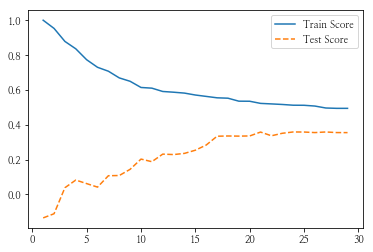

In [59]:
plt.plot(dpara_leaf, dtrain_score, linestyle='-', label="Train Score")
plt.plot(dpara_leaf, dtest_score, linestyle='--', label='Test Score')
plt.legend()

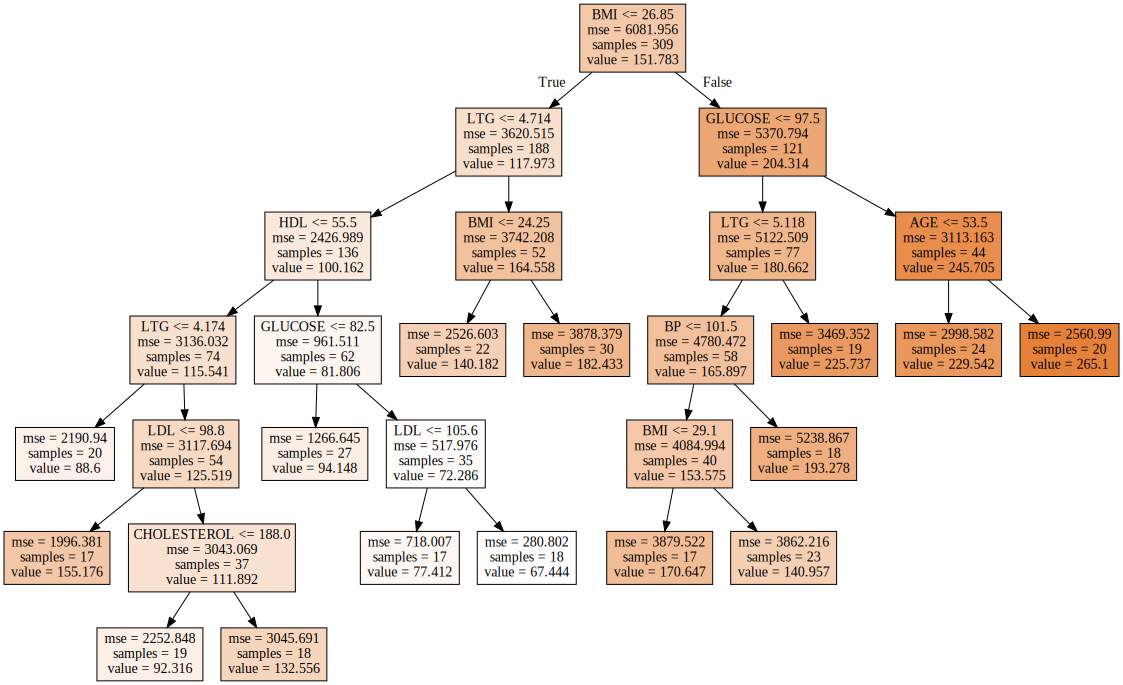

In [61]:
d_feature_name = dfd_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=17)
tree_graph.fit(dfd_train_x, dfd_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot',
               feature_names=d_feature_name, impurity=True, filled=True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

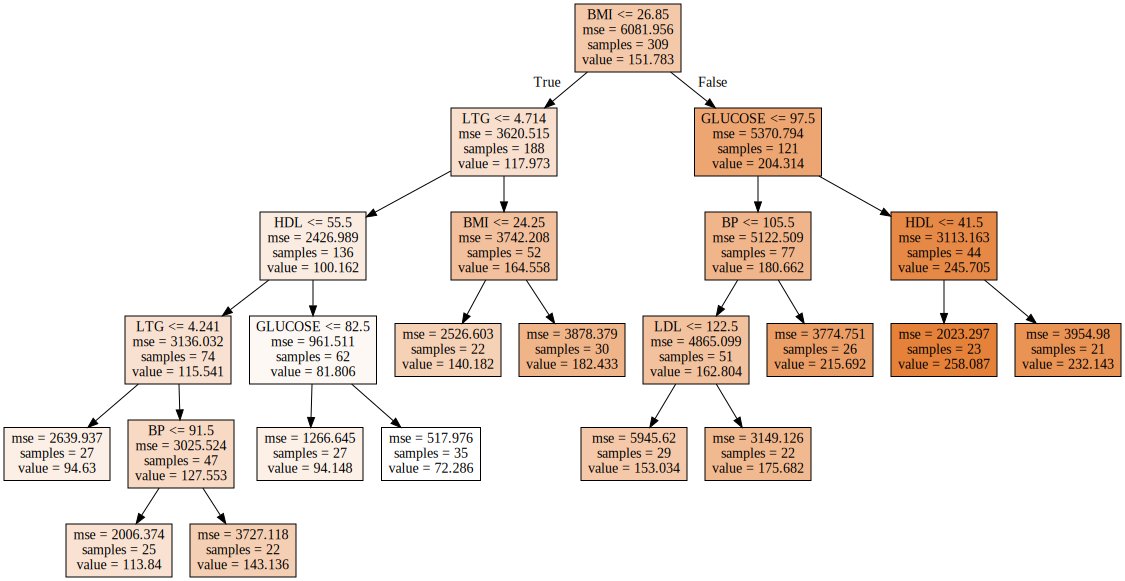

In [62]:
d_feature_name = dfd_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=21)
tree_graph.fit(dfd_train_x, dfd_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot',
               feature_names=d_feature_name, impurity=True, filled=True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [98]:
dtrain_score=[]
dtest_score=[]
dpara_split = [n_split * 2 for n_split in range (10,30)]

for v_min_samples_split in dpara_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=17, min_samples_split=v_min_samples_split)
    tree.fit(dfd_train_x, dfd_train_y)
    dtrain_score.append(tree.score(dfd_train_x, dfd_train_y))
    dtest_score.append(tree.score(dfd_test_x, dfd_test_y))
    
dfd_score_split = pd.DataFrame()
dfd_score_split['MinSamplesSplit'] = dpara_split
dfd_score_split['TrainScore'] = dtrain_score
dfd_score_split['TestScore'] = dtest_score

In [99]:
dfd_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,20,0.555,0.334
1,22,0.555,0.334
2,24,0.555,0.334
3,26,0.555,0.334
4,28,0.555,0.334
5,30,0.555,0.334
6,32,0.555,0.334
7,34,0.555,0.334
8,36,0.554,0.332
9,38,0.546,0.328


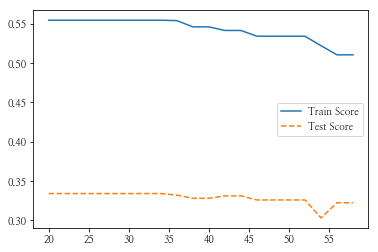

In [100]:
plt.plot(dpara_split, dtrain_score, linestyle='-', label="Train Score")
plt.plot(dpara_split, dtest_score, linestyle='--', label='Test Score')
plt.legend()

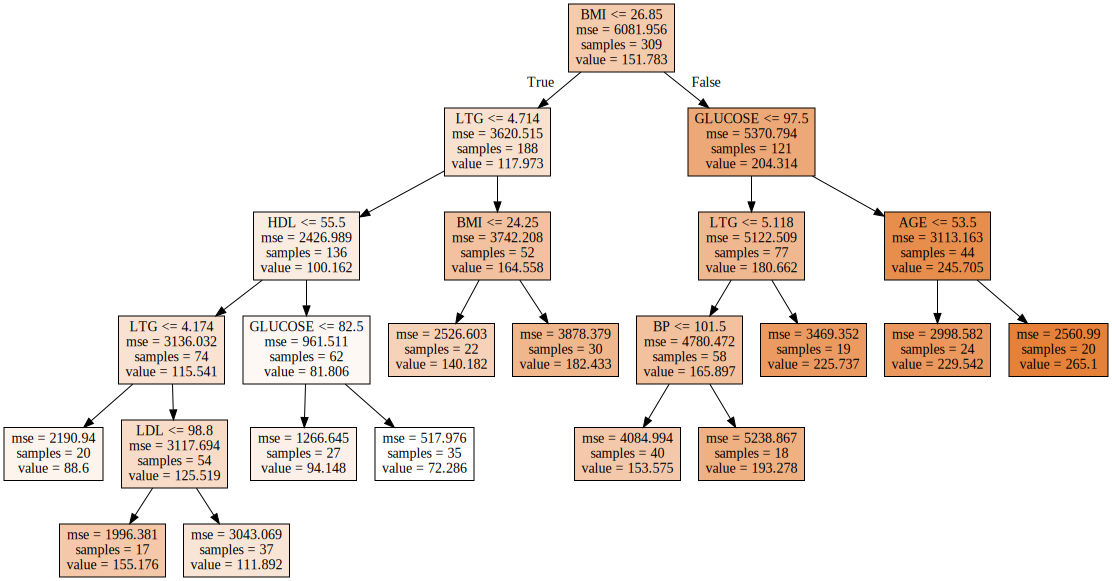

In [101]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=17, min_samples_split=42)
tree_graph.fit(dfd_train_x, dfd_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot',
               feature_names=d_feature_name, impurity=True, filled=True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

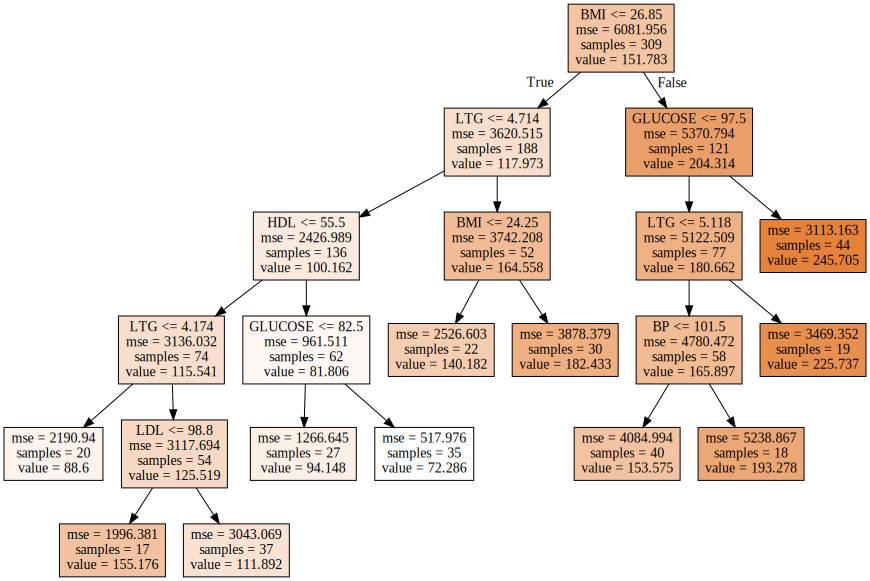

In [102]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=17, min_samples_split=52)
tree_graph.fit(dfd_train_x, dfd_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot',
               feature_names=d_feature_name, impurity=True, filled=True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [103]:
dtrain_score=[]
dtest_score=[]
dpara_depth = [depth for depth in range (2,22)]

for v_max_depth in dpara_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=17, min_samples_split=42,
                                max_depth=v_max_depth)
    tree.fit(dfd_train_x, dfd_train_y)
    dtrain_score.append(tree.score(dfd_train_x, dfd_train_y))
    dtest_score.append(tree.score(dfd_test_x, dfd_test_y))
    
dfd_score_depth = pd.DataFrame()
dfd_score_depth['Depth'] = dpara_depth
dfd_score_depth['TrainScore'] = dtrain_score
dfd_score_depth['TestScore'] = dtest_score

In [104]:
dfd_score_depth.round(3)

,Depth,TrainScore,TestScore
0,2,0.438,0.351
1,3,0.505,0.327
2,4,0.530,0.351
3,5,0.542,0.331
4,6,0.542,0.331
5,7,0.542,0.331
6,8,0.542,0.331
7,9,0.542,0.331
8,10,0.542,0.331
9,11,0.542,0.331


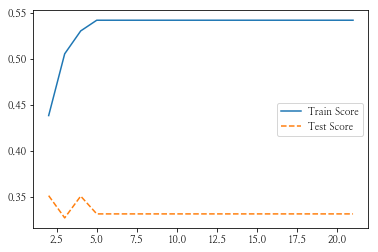

In [105]:
plt.plot(dpara_depth, dtrain_score, linestyle='-', label="Train Score")
plt.plot(dpara_depth, dtest_score, linestyle='--', label='Test Score')
plt.legend()

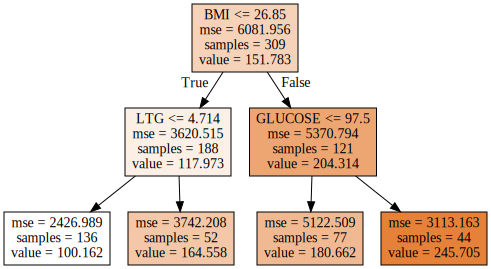

In [106]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=17, min_samples_split=52, max_depth=2)
tree_graph.fit(dfd_train_x, dfd_train_y)
export_graphviz(tree_graph, out_file='tree_depth.dot',
               feature_names=d_feature_name, impurity=True, filled=True)
with open('tree_depth.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

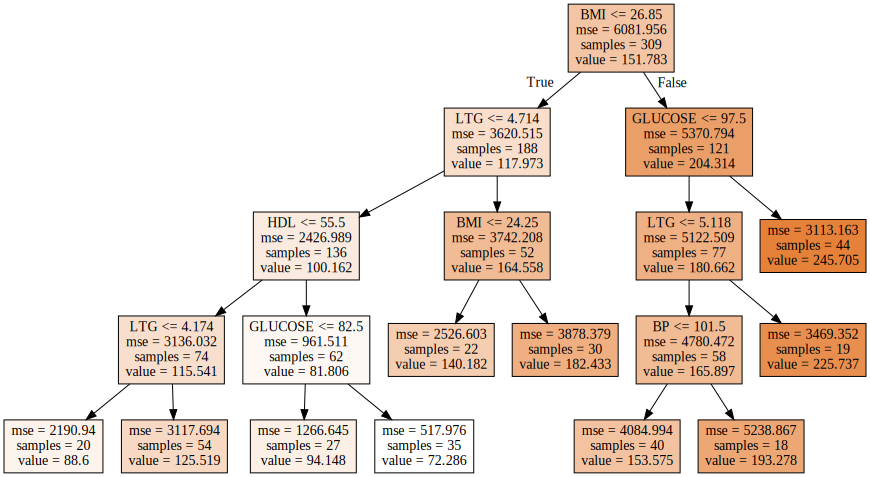

In [107]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=17, min_samples_split=52, max_depth=4)
tree_graph.fit(dfd_train_x, dfd_train_y)
export_graphviz(tree_graph, out_file='tree_depth.dot',
               feature_names=d_feature_name, impurity=True, filled=True)
with open('tree_depth.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [119]:
tree_final = DecisionTreeRegressor(min_samples_leaf=17, min_samples_split=42, max_depth=4, random_state=1234)
tree_final.fit(dfd_train_x, dfd_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=42, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [120]:
# train 데이터 설명력
print("Score on train set : {:.3f}".format(tree_final.score(dfd_train_x, dfd_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(tree_final.score(dfd_test_x, dfd_test_y)))

Score on train set : 0.530
Score on test set : 0.351


In [111]:
estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion" : ['mse', 'friedman_mse', 'mae'], "max_features" : ['auto','sqrt','log2'],
             "max_depth" : dpara_depth, "min_samples_split" : dpara_split, "min_samples_leaf" : dpara_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
grid_dt.fit(dfd_train_x, dfd_train_y)

print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model : 
DecisionTreeRegressor(criterion='mse', max_depth=15, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=16,
           min_samples_split=26, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

best parameter : 
{'criterion': 'mse', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'min_samples_split': 26}

best score : 
0.4


In [112]:
tree_best = DecisionTreeRegressor(criterion='mse', max_features='sqrt', min_samples_leaf=16, min_samples_split=26, max_depth=15, random_state=1234)
tree_best.fit(dfd_train_x, dfd_train_y)

# train 데이터 설명력
print("Score on train set : {:.3f}".format(tree_best.score(dfd_train_x, dfd_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(tree_best.score(dfd_test_x, dfd_test_y)))

Score on train set : 0.471
Score on test set : 0.351
